In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [3]:
rides.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:xlabel='dteday'>

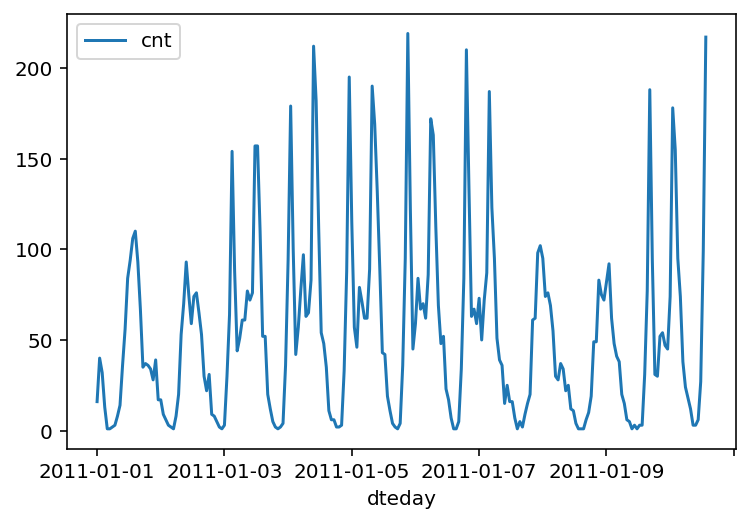

In [8]:
rides[:24*10].plot(x='dteday', y='cnt')


In [9]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler

In [35]:
scail = StandardScaler()

quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
data[quant_features] = scail.fit_transform(data[quant_features])
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334648,0.947372,-1.553889,-0.662755,-0.930189,-0.956339,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438516,0.895539,-1.553889,-0.561343,-0.804655,-0.824022,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438516,0.895539,-1.553889,-0.622190,-0.837690,-0.868128,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334648,0.636370,-1.553889,-0.662755,-0.950010,-0.972879,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334648,0.636370,-1.553889,-0.723603,-1.009474,-1.039037,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
print(data['temp'].mean(), data['temp'].std())

1.5699891278662665e-16 1.0000287715966858


In [32]:
#data[quant_features] = scail.inverse_transform(data[quant_features])
#data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3.0,13.0,16.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8.0,32.0,40.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5.0,27.0,32.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3.0,10.0,13.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [41]:
target_fields = ['cnt', 'casual', 'registered']
X = data.drop(target_fields, axis=1)
y = data[target_fields]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)


In [44]:
y_test.head()

,cnt,casual,registered
12830,1.298566,3.028658,0.569617
8688,-0.559388,-0.622190,-0.467694
7091,-1.022498,-0.703320,-0.996260
12230,1.855400,0.675889,2.003352
431,-0.972879,-0.622190,-0.963225


In [105]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [73]:
from tensorflow import keras

In [200]:
indim = X_train.shape[1]
model = Sequential()
model.add(Dense(8, input_dim=indim, activation='sigmoid'))
model.add(Dense(1))

In [201]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])


In [190]:
model.fit(X_train, y_train['cnt'], epochs=10, batch_size=10, validation_split = 0.05)


Train on 11060 samples, validate on 583 samples
Epoch 1/10
11060/11060 [==============================] - 3s 290us/step - loss: 0.1324 - mean_squared_error: 0.1324 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 2/10
11060/11060 [==============================] - 3s 277us/step - loss: 0.1192 - mean_squared_error: 0.1192 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 3/10
11060/11060 [==============================] - 4s 325us/step - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.1152 - val_mean_squared_error: 0.1152
Epoch 4/10
11060/11060 [==============================] - 4s 340us/step - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.1289 - val_mean_squared_error: 0.1289
Epoch 5/10
11060/11060 [==============================] - 4s 320us/step - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 6/10
11060/11060 [==============================] - 4s 329us/step - loss: 0.1173 - mean_squared_error: 0.1

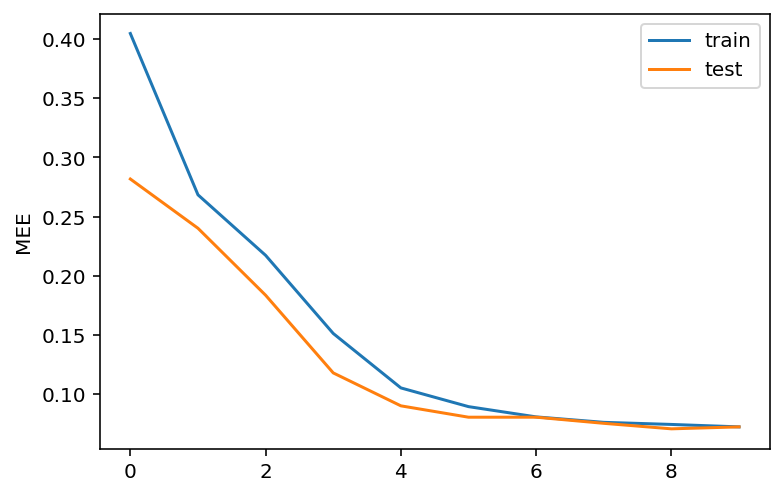

In [202]:
from matplotlib import pyplot
# generate 2d classification dataset

# fit model
history = model.fit(X_train, y_train['cnt'], validation_data=(X_test, y_test['cnt']), epochs=10, verbose=0)

# learning curves of model accuracy
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.ylabel('MEE')
pyplot.legend()

In [186]:
history.history.keys()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])

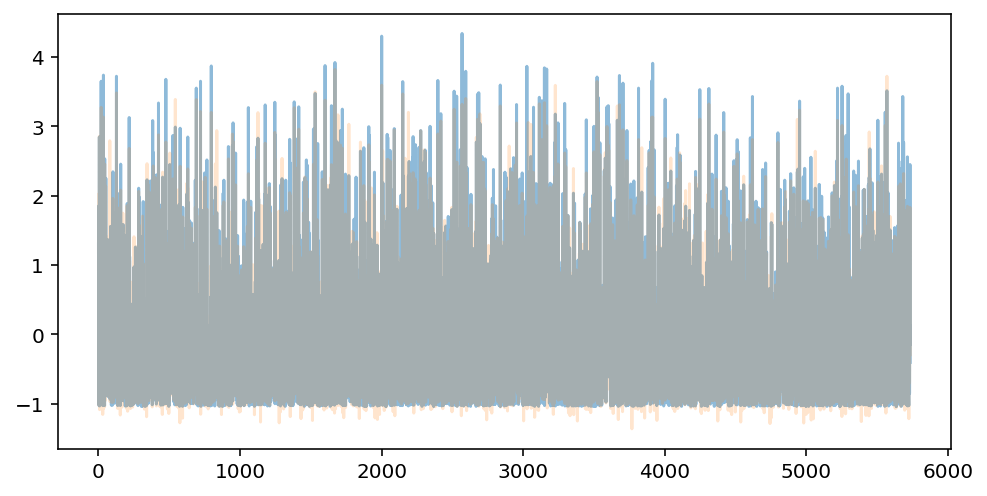

In [227]:
fig, ax = plt.subplots(figsize=(8,4))
predict = model.predict(X_test)

pyplot.plot(y_test['cnt'].values, alpha=0.5)
pyplot.plot(predict, alpha=0.2)


In [234]:
not_scailed = data
not_scailed[quant_features] = scail.inverse_transform(data[quant_features])
not_scailed.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3.0,13.0,16.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8.0,32.0,40.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5.0,27.0,32.0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3.0,10.0,13.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [238]:
cnt_mean = not_scailed['cnt'].mean()
cnt_std = not_scailed['cnt'].std()
Inv_predict = predict*cnt_std+cnt_mean
Inv_y_test = y_test['cnt'].values*cnt_std+cnt_mean

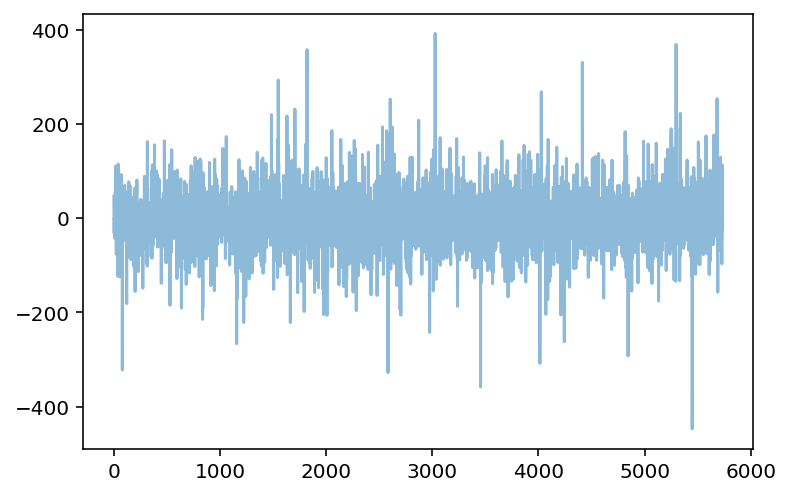

In [250]:
residual = Inv_y_test[:,None]-Inv_predict
pyplot.plot(residual, alpha=0.5)
#pyplot.plot(Inv_predict, alpha=0.2)

In [249]:
Inv_y_test[:,None].shape

(5736, 1)

In [248]:
Inv_predict.shape

(5736, 1)